# Zadanie domowe
Jakub Garus<br>
Nr indeksu: 145241<br>
Grupa laboratoryjna: I4.1<br>
## Zbiór danych
Zestaw dotyczący roku 2021 skonstruowany został na podstawie sondażu Gallup World Poll. Posłużył on do przeprowadzenia badań na temat poziomu szczęścia obywateli w poszczególnych krajach. Rezultat opracowano w dokumencie: 
[The World Happiness Report.](https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021)<br>
Sondaż stanowi zestaw obserwacji pozyskaych przy użyciu ankiet telefonicznych.<br>
W skład cech wchodzą dwie kolumny o typie łańcucha znaków zawierające nazwę państwa oraz regionu. Reszta cech to wartości dziesiętne, wyjaśniające w jakim stopniu każdy z sześciu czynników - produkcja ekonomiczna, wsparcie społeczne, oczekiwana długość życia, wolność, brak korupcji oraz hojność - przyczyniają się do wzrostu oceny życia.

In [27]:
library(ggplot2)
library(dplyr)
data <- read.csv("world-happiness-report-2021.csv", sep = ",")

# Analiza eksploracyjna
### Prezentacja 10 początkowych wierszy danych:

In [28]:
head(data, 10)

,ď.żCountry.name,Regional.indicator,Ladder.score,Standard.error.of.ladder.score,upperwhisker,lowerwhisker,Logged.GDP.per.capita,Social.support,Healthy.life.expectancy,Freedom.to.make.life.choices,Generosity,Perceptions.of.corruption,Ladder.score.in.Dystopia,Explained.by..Log.GDP.per.capita,Explained.by..Social.support,Explained.by..Healthy.life.expectancy,Explained.by..Freedom.to.make.life.choices,Explained.by..Generosity,Explained.by..Perceptions.of.corruption,Dystopia...residual
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
2,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
3,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
4,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
5,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
6,Norway,Western Europe,7.392,0.035,7.462,7.323,11.053,0.954,73.3,0.960,0.093,0.270,2.43,1.543,1.108,0.782,0.703,0.249,0.427,2.580
7,Sweden,Western Europe,7.363,0.036,7.433,7.293,10.867,0.934,72.7,0.945,0.086,0.237,2.43,1.478,1.062,0.763,0.685,0.244,0.448,2.683
8,Luxembourg,Western Europe,7.324,0.037,7.396,7.252,11.647,0.908,72.6,0.907,-0.034,0.386,2.43,1.751,1.003,0.760,0.639,0.166,0.353,2.653
9,New Zealand,North America and ANZ,7.277,0.040,7.355,7.198,10.643,0.948,73.4,0.929,0.134,0.242,2.43,1.400,1.094,0.785,0.665,0.276,0.445,2.612


In [29]:
print(paste("Liczba obserwacji:", nrow(data)))
print(paste("Liczba cech", ncol(data)))

[1] "Liczba obserwacji: 149"
[1] "Liczba cech 20"


### Histogram wraz z szeregiem rozdzielczym:
Zmienną wykorzystaną do realizacji szeregu rozdzleczego oraz histogramu jest Ladder.score, czyli deklarowany w danym kraju poziom szczęścia.

In [30]:
rozstep <- max(data$Ladder.score) - min(data$Ladder.score)
k <- rozstep / (IQR(data$Ladder.score) * 2.64 * length(data$Ladder.score)^(-1/3))
szerokosc_przedzialu <- rozstep / k

print(paste("Najmniejsza wartość:", min(data$Ladder.score)))
print(paste("Największa wartość:", max(data$Ladder.score)))
print(paste("Rozstęp:", rozstep))
print(paste("Liczba przedziałów:", k))
print(paste("Szerokość przedziału:", szerokosc_przedzialu))

[1] "Najmniejsza wartość: 2.523"
[1] "Największa wartość: 7.842"
[1] "Rozstęp: 5.319"
[1] "Liczba przedziałów: 7.61313998257901"
[1] "Szerokość przedziału: 0.698660475463654"


[1] "Szereg rozdzielczy:"



[2.52,3.22) [3.22,3.92) [3.92,4.62) [4.62,5.32) [5.32,6.02) [6.02,6.71) 
          2          10          17          36          33          31 
[6.71,7.41) 
         15 

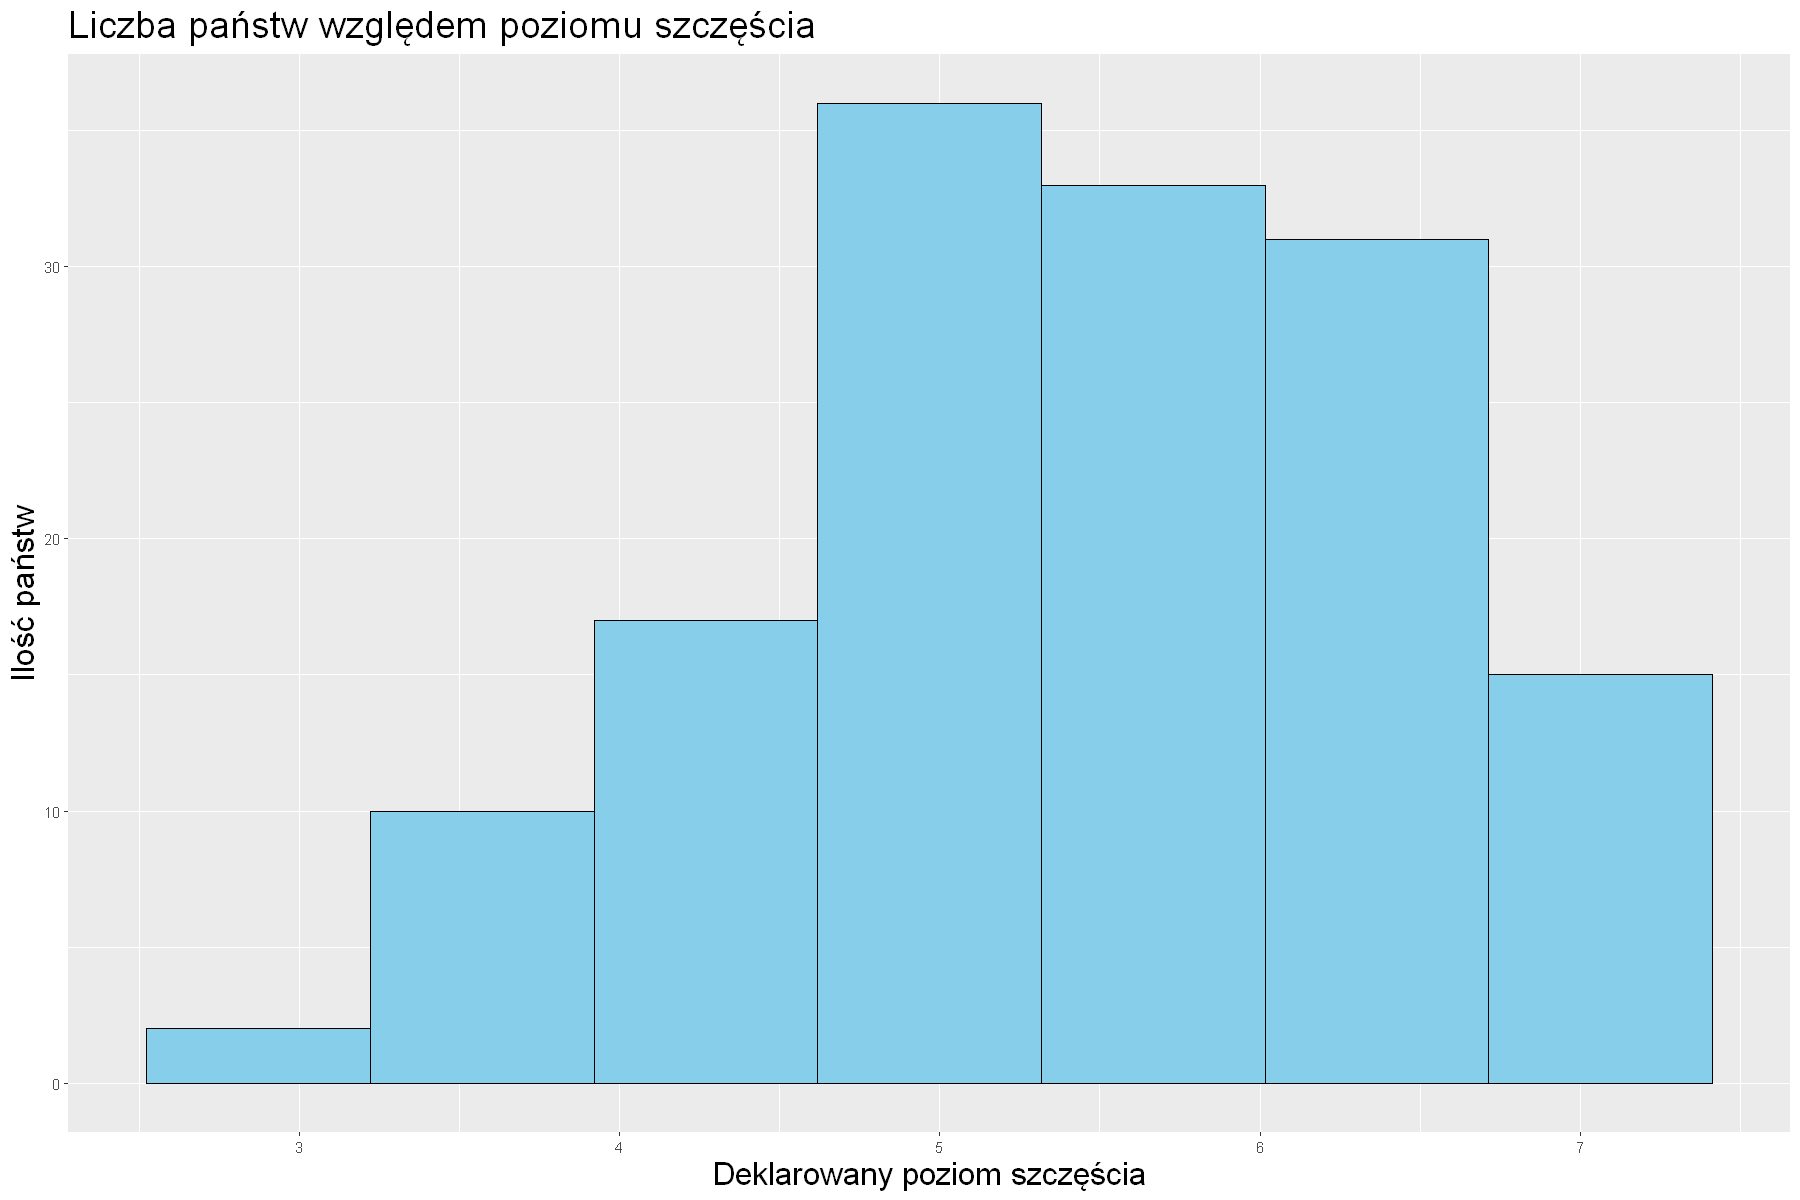

In [31]:
breaks <- seq(min(data$Ladder.score), max(data$Ladder.score), szerokosc_przedzialu)

options(repr.plot.width = 15, repr.plot.height = 10)
 
ggplot(data, aes(Ladder.score)) +
    geom_histogram(breaks = breaks, color = "black", fill = "skyblue") +
    theme(title = element_text(size = 19)) +
    labs(title = "Liczba państw względem poziomu szczęścia",
         x = "Deklarowany poziom szczęścia",
         y = "Ilość państw")

print(paste("Szereg rozdzielczy:"))
table(cut(data$Ladder.score, breaks, right = FALSE))

Rozkład ilości państw względem dobrobytu przypomina rozkład normalny. Można wyciągnąć optymistyczne wnioski, gdyż zdecydowana mniejszość państw cechuje się niskim wskaźnikiem oceny życia.

# Dodatkowe wykresy

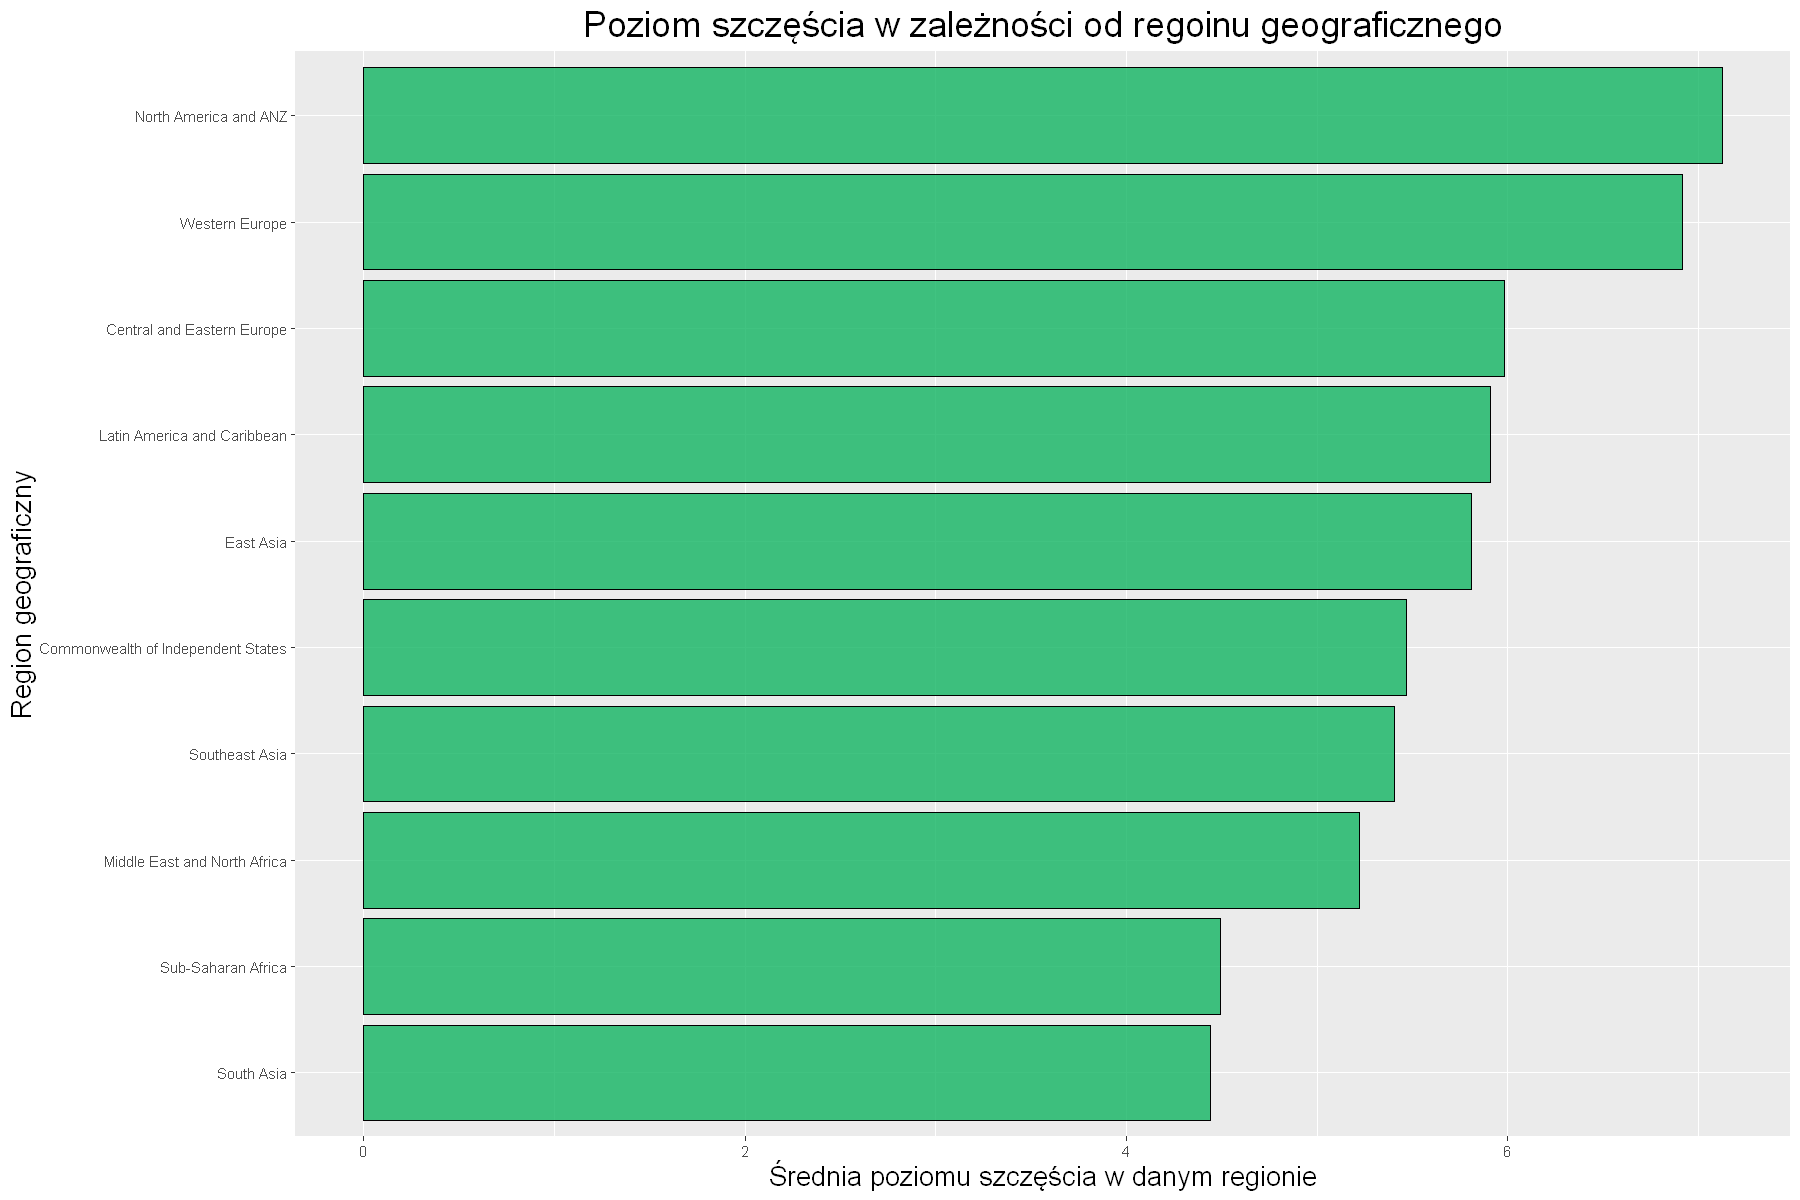

In [32]:
grouped_mean_data <- aggregate(data$Ladder.score, list(data$Regional.indicator), mean)

ggplot(grouped_mean_data, aes(reorder(Group.1, x), y = x))+
geom_col(fill = "#11b461", color = "black", alpha = 0.8) + 
coord_flip() +
labs(title = "Poziom szczęścia w zależności od regoinu geograficznego",
     x = "Region geograficzny",
     y = "Średnia poziomu szczęścia w danym regionie") +
theme(title = element_text(size = 18),
      plot.title = element_text(hjust = .5),
      axis.title.y = element_text(size = 16),
      axis.title.x = element_text(size = 16),
      legend.position = "none")

Z wykresy wynika, że najbardziej zadowolenie z życia są obywatele Europy Zachodniej oraz Ameryki Północnej. Niskie wskaźniki szczęścia odnotowano w krajach Afryki Subsaharyjskiej oraz Azji Południowej. Jednym z głównych powodów takiego stanu rzeczy może być bezpieczeństwo finansowe.


Call:
lm(formula = data$Ladder.score ~ data$Logged.GDP.per.capita)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.32190 -0.46198  0.08206  0.50740  1.32618 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 -1.3719     0.4456  -3.079  0.00248 ** 
data$Logged.GDP.per.capita   0.7320     0.0469  15.610  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.661 on 147 degrees of freedom
Multiple R-squared:  0.6237,	Adjusted R-squared:  0.6212 
F-statistic: 243.7 on 1 and 147 DF,  p-value: < 2.2e-16


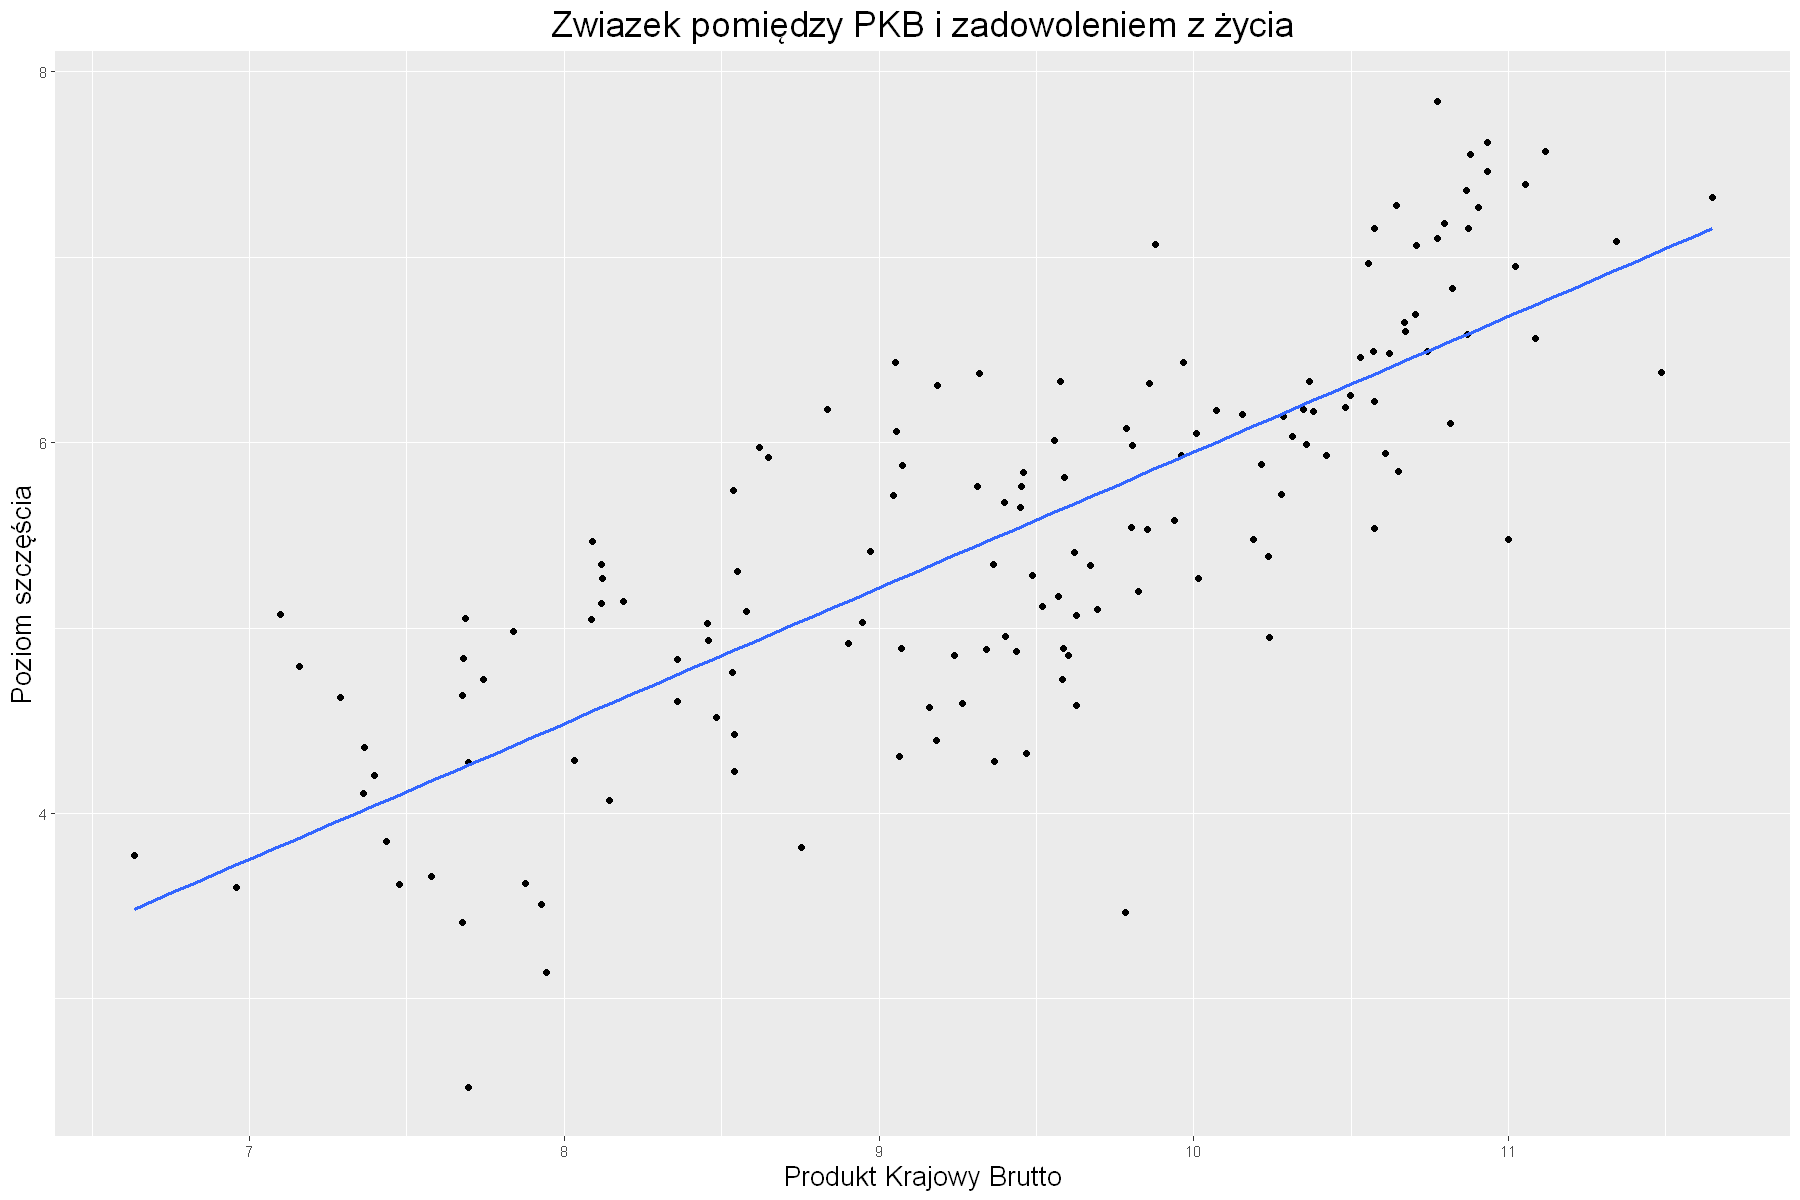

In [33]:
ggplot(data, aes(x = Logged.GDP.per.capita, y = Ladder.score)) +
geom_point() +
stat_smooth(formula = y ~ x, method = "lm", se = FALSE) +
labs(title = "Zwiazek pomiędzy PKB i zadowoleniem z życia",
     x = "Produkt Krajowy Brutto",
     y = "Poziom szczęścia") +
theme(title = element_text(size = 18),
      plot.title = element_text(hjust = .5),
      axis.title.y = element_text(size = 16),
      axis.title.x = element_text(size = 16))

model <- lm(data$Ladder.score ~ data$Logged.GDP.per.capita)
summary(model)

Realizacja wykresu regresji liniowej poziomu szczęścia oraz zmiennej objaśniejącej dotyczącej wskaźnika PKB
pokazuje korelację między zmiennymi.<br>Z danych dostarczonych przez model można wnioskować, iż powodzenie finansowe wpływa na ocenę
życia na poziomie 62%.

### Wyznaczenie wartości statystyk opisowych:

In [34]:
central_moment <- function(x, y) {
  mean((x - mean(x))^y)
}

kurtosis <- function(x) {
  central_moment(x, 4) / sqrt(central_moment(x, 2))^4
}

skewness <- function(x) {
  central_moment(x, 3) / sqrt(central_moment(x, 2))^3
}

statistics <- data.frame(row.names = c("Wartość minimalna", "Wartość maksymalna", "Mediana", "Średnia", "Wariancja",
                                       "Odchylenie standardowe", "Kurtoza", "Współczynnik skośności"))

# Pierwsze dwie kolumny zawierają dane dotyczące regionu
data2 <- data[, -c(1:2)]

for (name in colnames(data2)) {
    statistics[, name] <- c(min(data2[, name]), max(data2[, name]), median(data2[, name]), mean(data2[, name]),
                            var(data2[, name]),sd(data2[, name]), kurtosis(data2[, name]), skewness(data2[, name]))
}
statistics

,Ladder.score,Standard.error.of.ladder.score,upperwhisker,lowerwhisker,Logged.GDP.per.capita,Social.support,Healthy.life.expectancy,Freedom.to.make.life.choices,Generosity,Perceptions.of.corruption,Ladder.score.in.Dystopia,Explained.by..Log.GDP.per.capita,Explained.by..Social.support,Explained.by..Healthy.life.expectancy,Explained.by..Freedom.to.make.life.choices,Explained.by..Generosity,Explained.by..Perceptions.of.corruption,Dystopia...residual
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Wartość minimalna,2.5230000,0.0260000000,2.5960000,2.44900000,6.6350000,0.46300000,48.4780000,0.38200000,-0.28800000,0.08200000,2.43,0.0000000,0.00000000,0.00000000,0.00000000,0.000000000,0.00000000,0.6480000
Wartość maksymalna,7.8420000,0.1730000000,7.9040000,7.78000000,11.6470000,0.98300000,76.9530000,0.97000000,0.54200000,0.93900000,2.43,1.7510000,1.17200000,0.89700000,0.71600000,0.541000000,0.54700000,3.4820000
Mediana,5.5340000,0.0540000000,5.6250000,5.41300000,9.5690000,0.83200000,66.6030000,0.80400000,-0.03600000,0.78100000,2.43,1.0250000,0.83200000,0.57100000,0.51400000,0.164000000,0.10100000,2.5090000
Średnia,5.5328389,0.0587516779,5.6480067,5.41763087,9.4322081,0.81474497,64.9927987,0.79159732,-0.01513423,0.72744966,2.43,0.9771611,0.79331544,0.52016107,0.49871141,0.178046980,0.13514094,2.4303289
Wariancja,1.1533118,0.0004840528,1.1116110,1.19876014,1.3423573,0.01319949,45.7252268,0.01284409,0.02269744,0.03212207,0.00,0.1638144,0.06701433,0.04537714,0.01901321,0.009657059,0.01307853,0.2890624
Odchylenie standardowe,1.0739236,0.0220011996,1.0543296,1.09487905,1.1586014,0.11488903,6.7620431,0.11333179,0.15065670,0.17922632,0.00,0.4047399,0.25887125,0.21301910,0.13788838,0.098270334,0.11436139,0.5376452
Kurtoza,2.6037486,9.0794157483,2.6381358,2.58174651,2.1716995,3.34181123,2.4145618,3.35473975,4.54198033,5.13476814,NaN,2.1715151,3.34645368,2.41389379,3.36057811,4.539553377,5.13753181,3.3929932
Współczynnik skośności,-0.1032159,1.8724873524,-0.1149896,-0.09561542,-0.3484713,-0.92834265,-0.5167282,-0.74717875,0.99976008,-1.56153943,NaN,-0.3484810,-0.92926476,-0.51632004,-0.74945295,0.999506090,1.56196863,-0.5531543


# Test statystyczny
### Test sprawdzający czy deklarowany poziom szczęścia obywateli państw Europy Zachodniej jest większy od światowej średniej.
Należy użyć testu Shapiro-Wilka aby sprawdzić czy dane mają rozkład normalny.<br>
Poziom istotności $\alpha$ = 0.05<br>
$H_{0}:$ Rozkład poziomu szczęścia jest rozkładem normalnym<br>
$H_{1}:$ Rozkład poziomu szczęścia nie jest rozkładem normalnym<br>

In [35]:
alpha <- 0.05
p_value <- shapiro.test(data$Ladder.score)[[2]]
print(paste("Wartość p:", p_value))
print(paste("Czy należy odrzucić hipotezę H0 na rzecz H1?:", p_value < alpha))

[1] "Wartość p: 0.489341055866571"
[1] "Czy należy odrzucić hipotezę H0 na rzecz H1?: FALSE"


Rozkład poziomu szczęścia jest rozkładem normalnym.<br>
Dodatkowo wartość kurtozy wynosi 2.6, podczas gdy przyjmuje się iż dla rozkładu normalnego wynosi ona 3.<br>
Wspólczynnik skośności to -0.1.

In [36]:
europe_data <- filter(data, Regional.indicator == "Western Europe")
non_europe_data <- filter(data, Regional.indicator != "Western Europe")

n <- ncol(europe_data)
print(paste("Liczebność:", n))

[1] "Liczebność: 20"


Liczebność próby jest mniejsza od 30, zatem przeprowadzony zostanie niesparowany test dla dwóch zbiorowości oraz małej liczebności.<br>
Równość wariancji, wymagana w założeniach tego testu, zostanie sprawdzona za pomocą testu F.<br>
Poziom istotności $\alpha$ = 0.05<br>
Jest to test dwustronny.<br>
$
H_{0}: \sigma_{0}^{2} = \sigma_{1}^{2}\\
H_{1}: \sigma_{0}^{2} \ne \sigma_{1}^{2}
$

In [39]:
sigma_1 <- sd(non_europe_data$Ladder.score)
sigma_2 <- sd(europe_data$Ladder.score)
alpha <- 0.05
n_1 <- ncol(non_europe_data)
n_2 <- ncol(europe_data)
df_1 <- n_1 - 1
df_2 <- n_2 - 1
f <- sigma_1^2 / sigma_2^2
p_value <- 1 - pf(f, df_1, df_2)
print(paste("Wartość p:", p_value))
print(paste("Statystyka F:", f))
print(paste("Czy należy odrzucic hipotezę H0 na rzecz H1?: ", p_value < alpha))

[1] "Wartość p: 0.0563655228179951"
[1] "Statystyka F: 2.10774968751356"
[1] "Czy należy odrzucic hipotezę H0 na rzecz H1?:  FALSE"


Można przeprowadzić test niesparowany dla małej liczebności.<br>
Poziom istotności $\alpha$ = 0.05<br>
Jest to test prawostronny.
$
H_{0}: \mu_{0} = \mu\\
H_{1}: \mu_{0} > \mu
$
$\mu_{0}$ to oczekiwana wartość deklaracji poziomu szczęścia wśród osób nie mieszkających w Europie Zachodniej<br>
$\mu$ to oczekiwana wartość deklaracji poziomu szczęścia wśród osób mieszkańców Europy Zachodniej<br>

In [40]:
alpha <- 0.05
mu_1 <- mean(non_europe_data$Ladder.score)
mu_2 <- mean(europe_data$Ladder.score)
degrees_of_freedom <- n_1 + n_2 - 2
s_p_squared <- ((n_1 - 1) * sigma_1^2 + (n_2 - 1) * sigma_2^2) / degrees_of_freedom
t <- (abs(mu_1 - mu_2)) / sqrt(s_p_squared * ((1 / n_1) + (1 / n_2)))
t_alpha <- -qt(alpha / 2, degrees_of_freedom)
print(paste("Statytyka T:", t))
print(paste("Czy należy odrzucic hipotezę H0 na rzecz H1?:", t > t_alpha))

[1] "Statytyka T: 6.21654975896306"
[1] "Czy należy odrzucic hipotezę H0 na rzecz H1?: TRUE"


Mamy podstawy do odrzucenia hipotezy zerowej, ponieważ wartość statystyki T znajduje się w zbiorze krytycznym.<br>
Możemy przyjąć, iż deklarowany poziom zadowolenia z życia obywateli państw Europy Zachodniej jest większy od światowej średniej.<br>
Z analizy regresji liniowej wynika, że na szczęśliwe życie znaczący wpływ ma sytuacja materialna, wyrażona wskaźnikiem PKB.<br>
Wyjaśnieniem ponadprzeciętnych wyników obywateli państw Europy Zachodniej jest wyższe bezpieczenstwo finansowe, przekładające się m.in. na jakościową opiekę zdrowotną oraz życiową samorealizację.

Test F, przeprowadzony został, ze względu na założenie o równych wariancjach, niesparowanego testu T dla małej liczebności (n = 20).

W celu lepszego zrozumienia problemu, należy przeprowadzić badanie kolejnych czynników mogących wpływać na dobrobyt obywateli t.j. pomoc socjalna (kolumna Social.support). Można również zbadać wpływ ogólności poziomu życia na inne czynniki np. hojność (kolumna Generosity).